In [75]:
import pandas as pd 
import numpy as np
import cufflinks as cf
import plotly.offline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [76]:
# Set up the connection to Plotly
cf.go_offline()

In [77]:
df=pd.read_csv('/home/cdsw/Loan_Default.csv')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [79]:
df.Status.unique()

array([1, 0])

In [80]:
df.describe()

ID      year   loan_amount  rate_of_interest  \
count  148670.000000  148670.0  1.486700e+05     112231.000000   
mean    99224.500000    2019.0  3.311177e+05          4.045476   
std     42917.476598       0.0  1.839093e+05          0.561391   
min     24890.000000    2019.0  1.650000e+04          0.000000   
25%     62057.250000    2019.0  1.965000e+05          3.625000   
50%     99224.500000    2019.0  2.965000e+05          3.990000   
75%    136391.750000    2019.0  4.365000e+05          4.375000   
max    173559.000000    2019.0  3.576500e+06          8.000000   

       Interest_rate_spread  Upfront_charges           term  property_value  \
count         112031.000000    109028.000000  148629.000000    1.335720e+05   
mean               0.441656      3224.996127     335.136582    4.978935e+05   
std                0.513043      3251.121510      58.409084    3.599353e+05   
min               -3.638000         0.000000      96.000000    8.000000e+03   
25%                0.076000       581.490000     360.000000    2.680000e+05   
50%                0.390400      2596.450000     360.000000    4.180000e+05   
75%                0.775400      4812.500000     360.000000    6.280000e+05   
max                3.357000     60000.000000     360.000000    1.650800e+07   

              income   Credit_Score            LTV         Status  \
count  139520.000000  148670.000000  133572.000000  148670.000000   
mean     6957.338876     699.789103      72.746457       0.246445   
std      6496.586382     115.875857      39.967603       0.430942   
min         0.000000     500.000000       0.967478       0.000000   
25%      3720.000000     599.000000      60.474860       0.000000   
50%      5760.000000     699.000000      75.135870       0.000000   
75%      8520.000000     800.000000      86.184211       0.000000   
max    578580.000000     900.000000    7831.250000       1.000000   

               dtir1  
count  124549.000000  
mean       37.732932  
std        10.545435  
min         5.000000  
25%        31.000000  
50%        39.000000  
75%        45.000000  
max        61.000000

In [81]:
df=df.drop(['ID','year'],axis=1)

In [82]:
df.head(5)

loan_limit             Gender approv_in_adv loan_type loan_purpose  \
0         cf  Sex Not Available         nopre     type1           p1   
1         cf               Male         nopre     type2           p1   
2         cf               Male           pre     type1           p1   
3         cf               Male         nopre     type1           p4   
4         cf              Joint           pre     type1           p1   

  Credit_Worthiness open_credit business_or_commercial  loan_amount  \
0                l1        nopc                  nob/c       116500   
1                l1        nopc                    b/c       206500   
2                l1        nopc                  nob/c       406500   
3                l1        nopc                  nob/c       456500   
4                l1        nopc                  nob/c       696500   

   rate_of_interest  ...  credit_type  Credit_Score  co-applicant_credit_type  \
0               NaN  ...          EXP           758                       CIB   
1               NaN  ...         EQUI           552                       EXP   
2              4.56  ...          EXP           834                       CIB   
3              4.25  ...          EXP           587                       CIB   
4              4.00  ...         CRIF           602                       EXP   

     age submission_of_application        LTV  Region Security_Type Status  \
0  25-34                   to_inst  98.728814   south        direct      1   
1  55-64                   to_inst        NaN   North        direct      1   
2  35-44                   to_inst  80.019685   south        direct      0   
3  45-54                  not_inst  69.376900   North        direct      0   
4  25-34                  not_inst  91.886544   North        direct      0   

  dtir1  
0  45.0  
1   NaN  
2  46.0  
3  42.0  
4  39.0  

[5 rows x 32 columns]

# description of the features

* loanlimit(A conforming mortgage means it meets the loan limits)The current maximum loan limit in most U.S. counties is $417,000
* gender(male,joint, not available)
* approv_in_adv (nopre,pre) pre-approval is a preliminary evaluation of a potential borrower by a lender to determine whether they are likely to be approved for a loan
* loan_type (type1,type2,type3 )type3 is the largest amount of money among them
* loan_purpose (p1,p3,p4)
* Credit_Worthiness
* The loan-to-value (LTV) ratio is a lending risk assessment ratio that financial institutions and other lenders examine before approving a mortgage


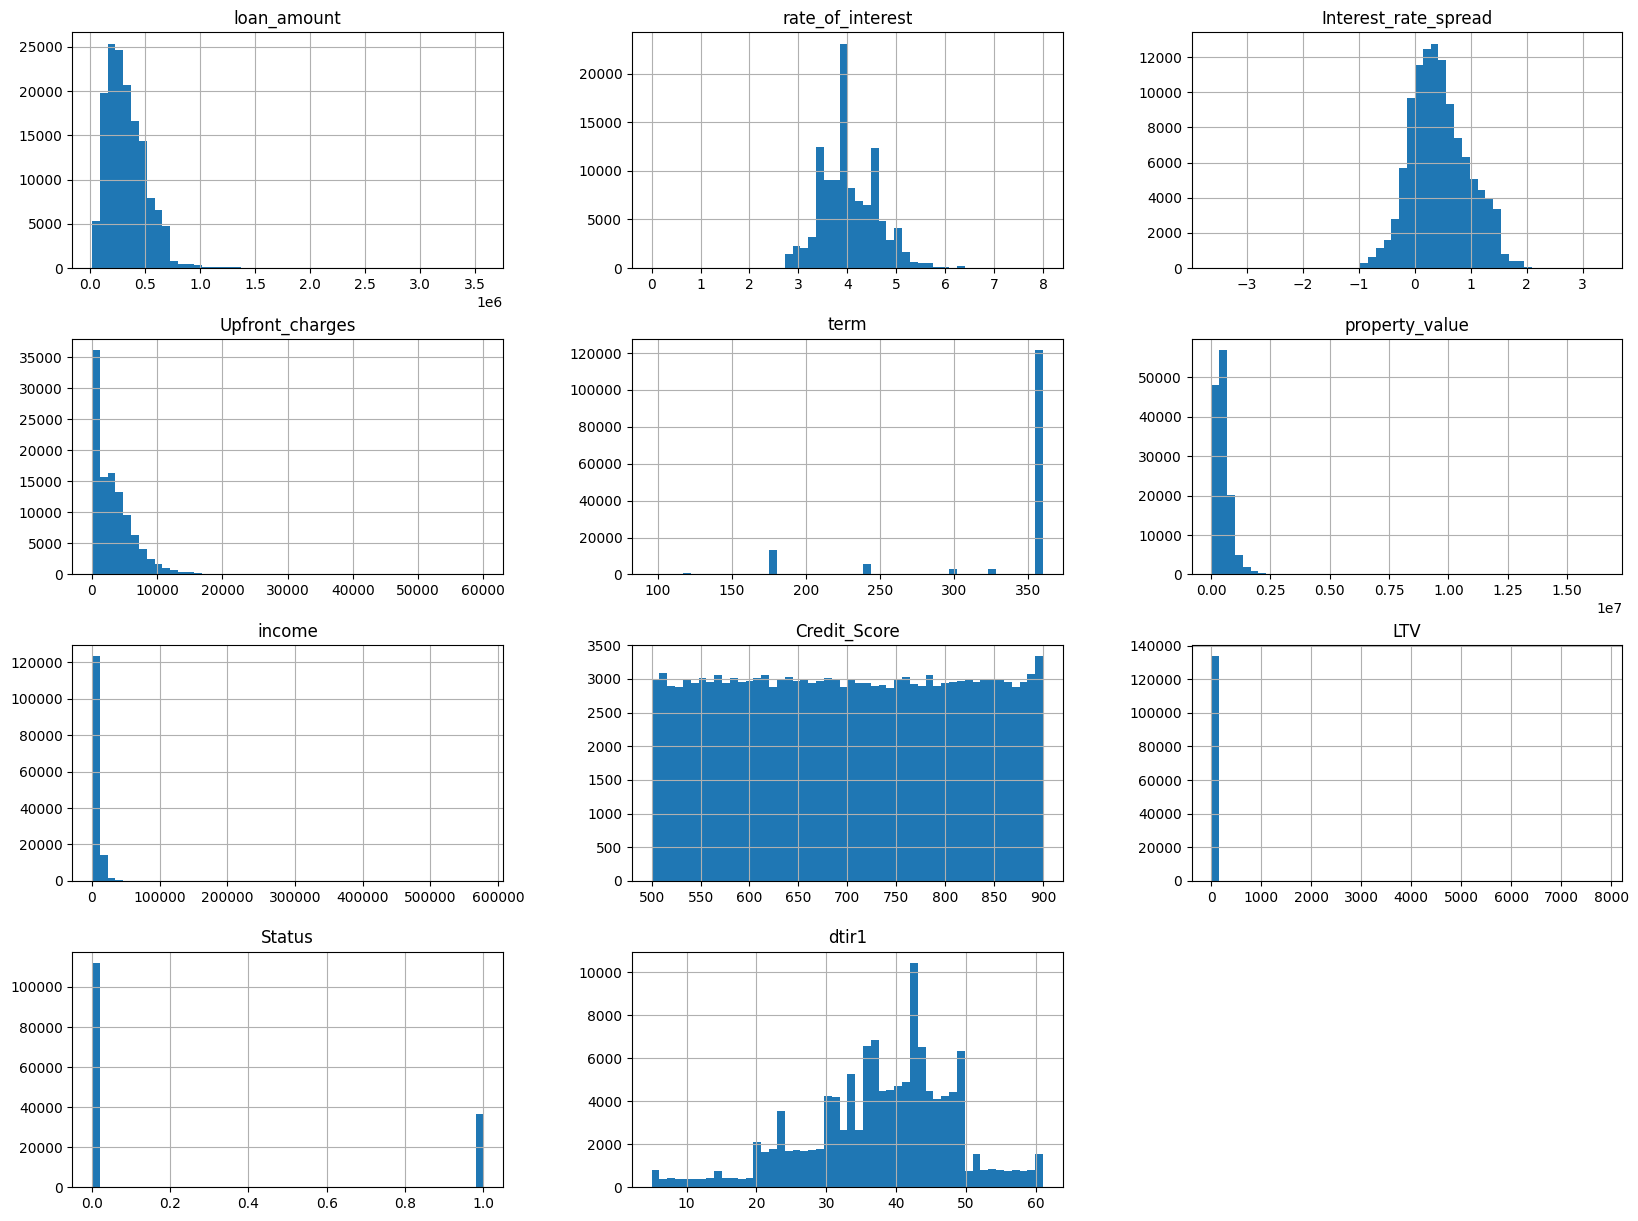

In [83]:
# Numerical data histogram to show the distribution  balance of data and ranges
df.hist(bins = 50, figsize = (20, 15))
plt.show()

In [84]:
df.isnull().sum()

loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_application      200
LTV                          15098
Region              

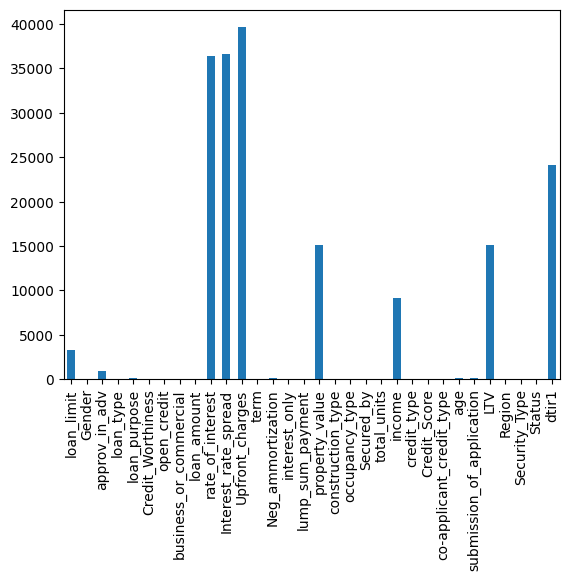

In [85]:
df.isna().sum().plot.bar()
plt.show()

null values in some features scores apploxematly 27%(the maximum ) of total data 

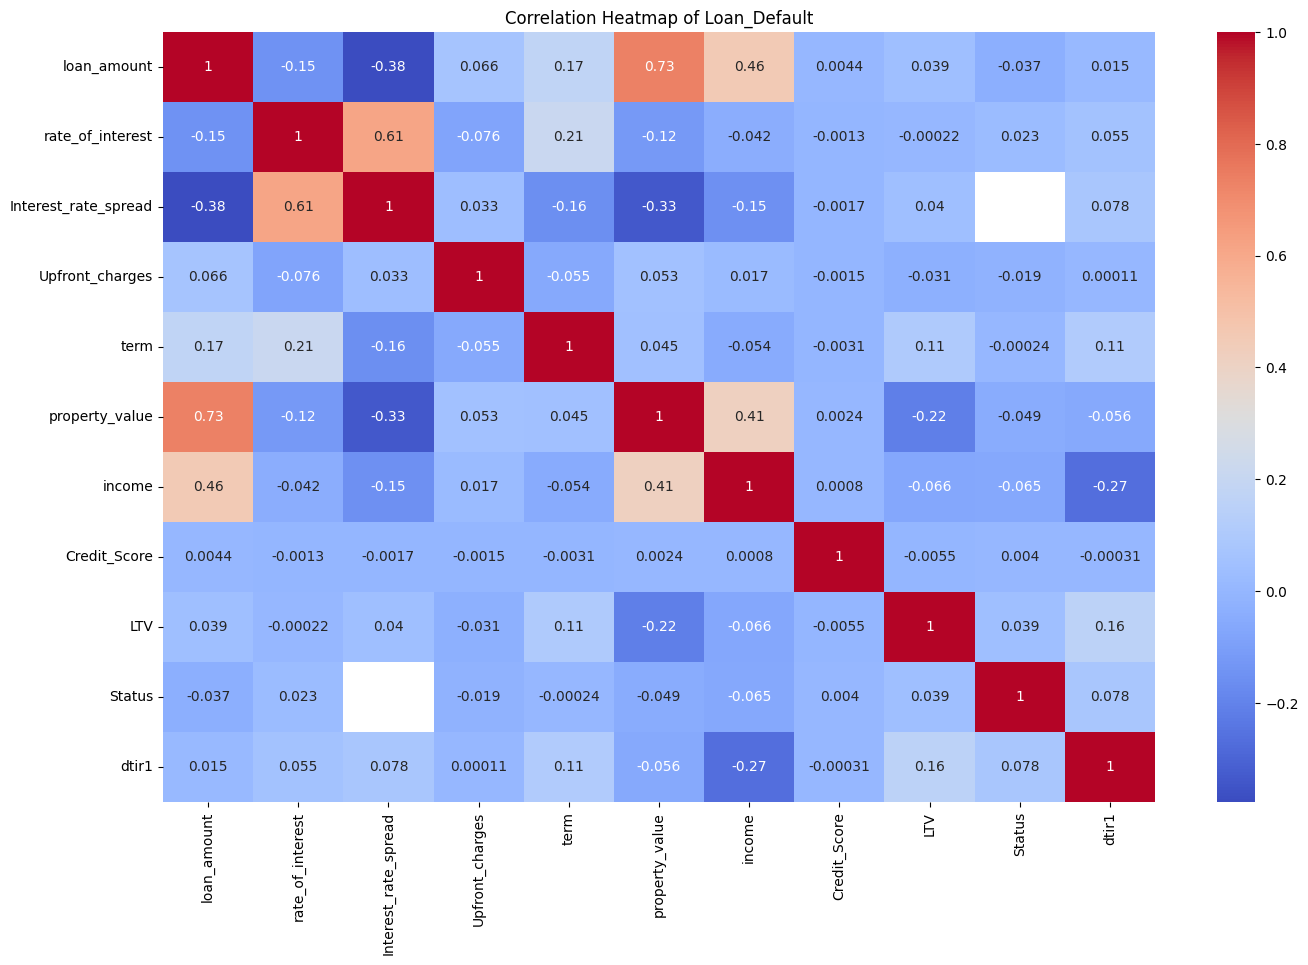

In [86]:

# Select only numerical columns for the heatmap
numerical_cols = df.select_dtypes(include=['number'])

# Create a correlation matrix
correlation_matrix = numerical_cols.corr()

# Create a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Loan_Default')
plt.show()

In [87]:
num=[]
for x in df:
    if df[x].dtype == 'int64' or df[x].dtype == 'float64':
        num.append(x)
    
    
print("numerical col :",num)    

numerical col : ['loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'Status', 'dtir1']


In [88]:
cat=[]
for x in df.columns:
    if df[x].dtype == 'object':
        cat.append(x)
    
    
print("categorical col :",cat)    

categorical col : ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Region', 'Security_Type']


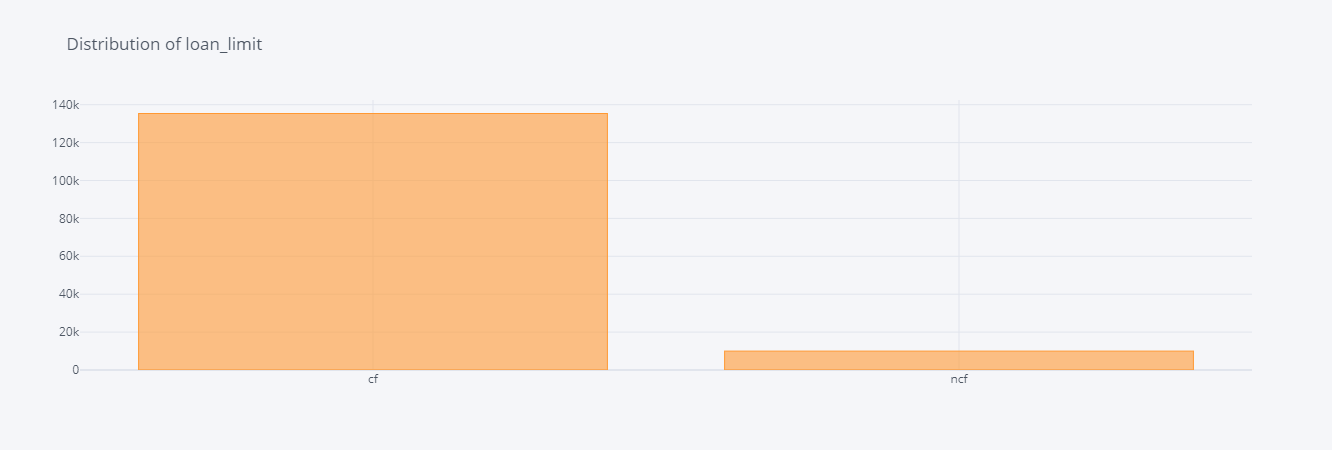

In [89]:
df['loan_limit'].value_counts().iplot(kind='bar', title='Distribution of loan_limit')


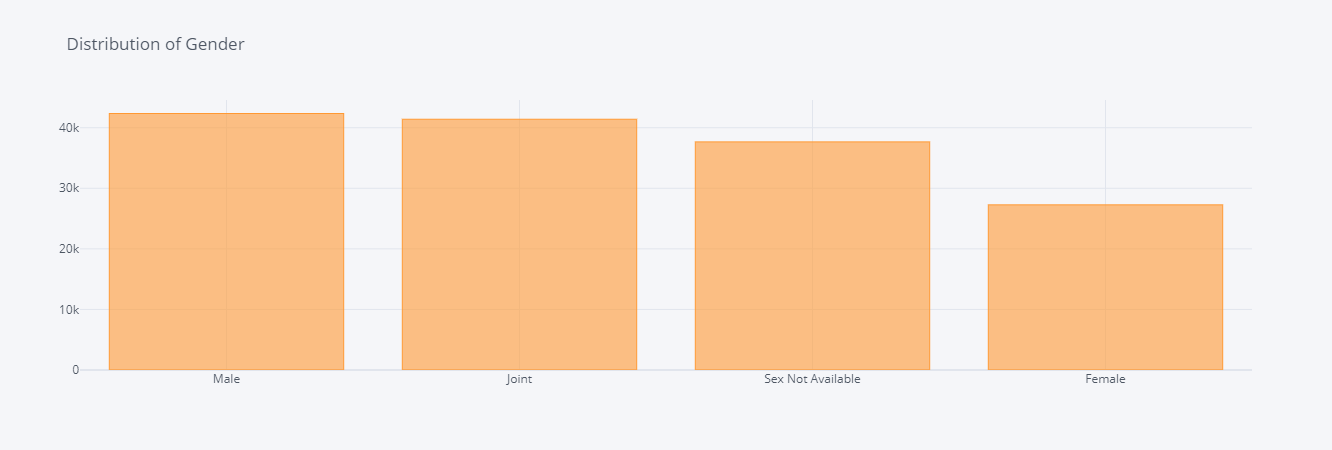

In [90]:
df['Gender'].value_counts().iplot(kind='bar', title='Distribution of Gender')


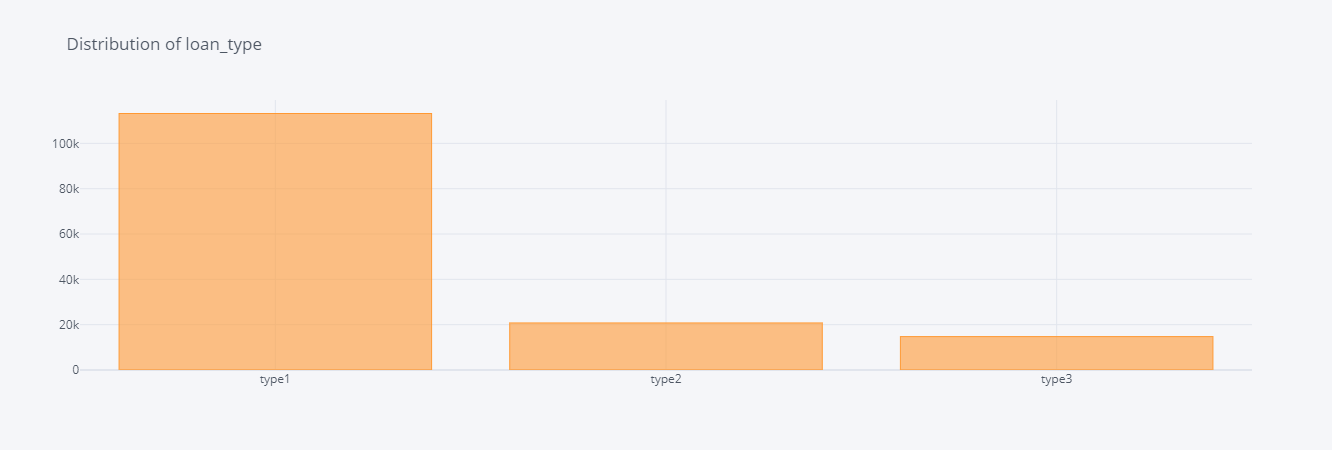

In [91]:
df['loan_type'].value_counts().iplot(kind='bar', title='Distribution of loan_type')  
# type 1 is the most needed loan with the minimum amount of money

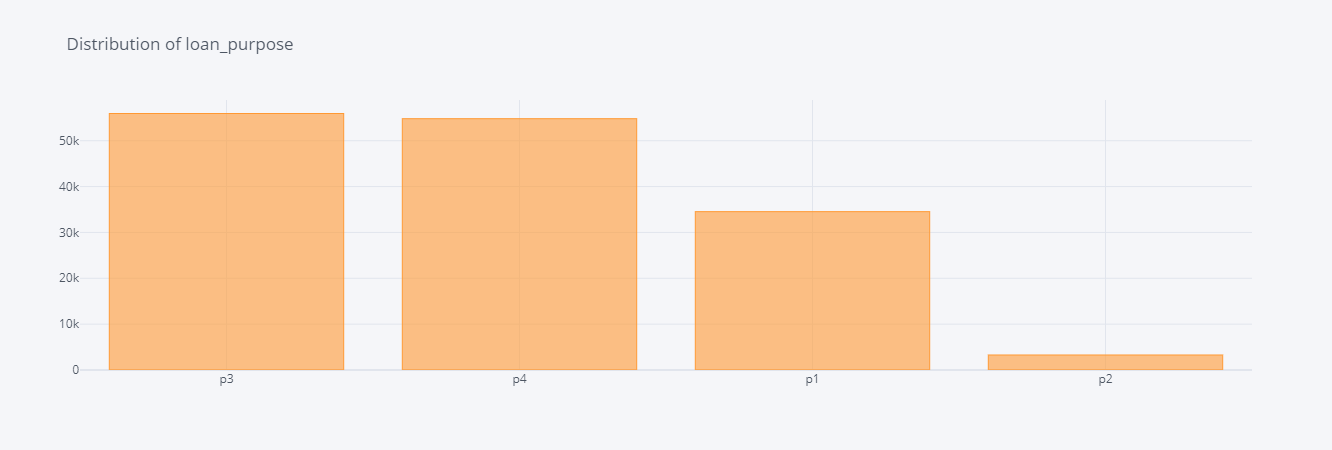

In [92]:
df['loan_purpose'].value_counts().iplot(kind='bar', title='Distribution of loan_purpose')


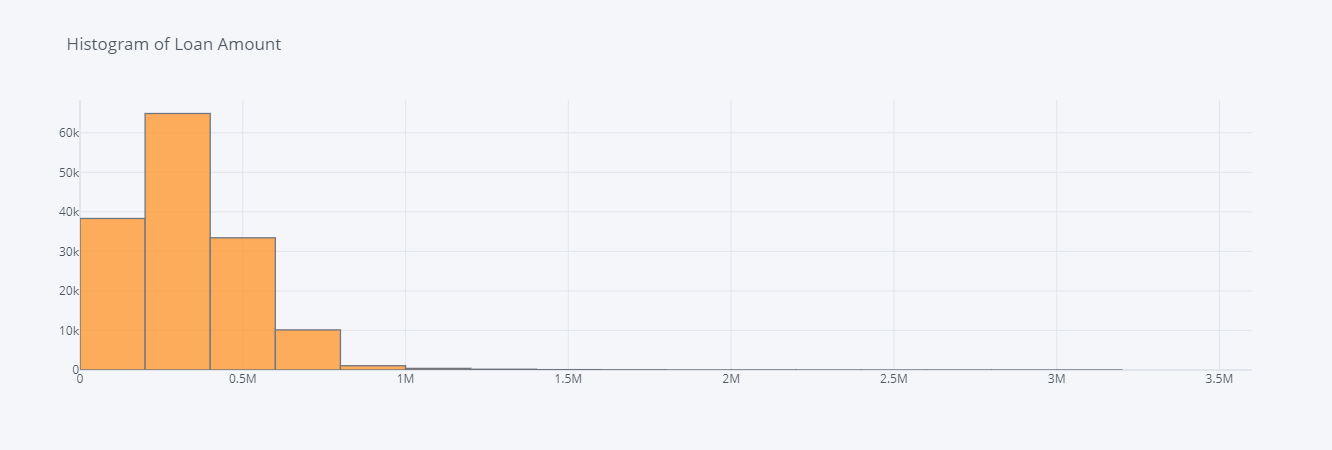

In [93]:
df['loan_amount'].iplot(kind='hist', bins=30, title='Histogram of Loan Amount')


the most needed loan is is from type1 and thethe amount nearly(200k to 400k)


In [94]:
#null values numerical 
for i in df.columns:
    print(i ,":" ,df[i].unique())

loan_limit : ['cf' nan 'ncf']
Gender : ['Sex Not Available' 'Male' 'Joint' 'Female']
approv_in_adv : ['nopre' 'pre' nan]
loan_type : ['type1' 'type2' 'type3']
loan_purpose : ['p1' 'p4' 'p3' 'p2' nan]
Credit_Worthiness : ['l1' 'l2']
open_credit : ['nopc' 'opc']
business_or_commercial : ['nob/c' 'b/c']
loan_amount : [ 116500  206500  406500  456500  696500  706500  346500  266500  376500
  436500  136500  466500  226500   76500  356500  156500  586500  306500
  316500  336500  426500  476500  196500  186500  246500  216500  506500
  656500  256500  396500  166500  236500  866500  416500  386500  596500
  606500   86500  286500  146500  446500  636500  486500  326500   56500
  906500  496500  106500  126500  296500  176500 1376500  566500  686500
  556500  676500  366500  276500  716500   66500  616500   96500  826500
   26500  666500  546500  986500  526500 1226500  726500 1486500 1416500
  536500  796500  516500   46500  876500  576500  626500 1506500  886500
  816500  646500  776500  7

In [95]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy='mean')
df[num] = mean_imputer.fit_transform(df[num])

In [96]:
df.Status.unique()

array([1., 0.])

In [97]:
for i in cat:
    mode=df[i].mode()
    mode=mode[0]
    df[i].fillna(value=mode,inplace=True)
    

/tmp/ipykernel_34/1146906669.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [98]:
df[cat].isnull().sum()

loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
credit_type                  0
co-applicant_credit_type     0
age                          0
submission_of_application    0
Region                       0
Security_Type                0
dtype: int64

In [99]:
df[num].isnull().sum()

loan_amount             0
rate_of_interest        0
Interest_rate_spread    0
Upfront_charges         0
term                    0
property_value          0
income                  0
Credit_Score            0
LTV                     0
Status                  0
dtir1                   0
dtype: int64

loan_amount                Axes(0.125,0.747241;0.227941x0.132759)
rate_of_interest        Axes(0.398529,0.747241;0.227941x0.132759)
Interest_rate_spread    Axes(0.672059,0.747241;0.227941x0.132759)
Upfront_charges            Axes(0.125,0.587931;0.227941x0.132759)
term                    Axes(0.398529,0.587931;0.227941x0.132759)
property_value          Axes(0.672059,0.587931;0.227941x0.132759)
income                     Axes(0.125,0.428621;0.227941x0.132759)
Credit_Score            Axes(0.398529,0.428621;0.227941x0.132759)
LTV                     Axes(0.672059,0.428621;0.227941x0.132759)
Status                      Axes(0.125,0.26931;0.227941x0.132759)
dtir1                    Axes(0.398529,0.26931;0.227941x0.132759)
dtype: object

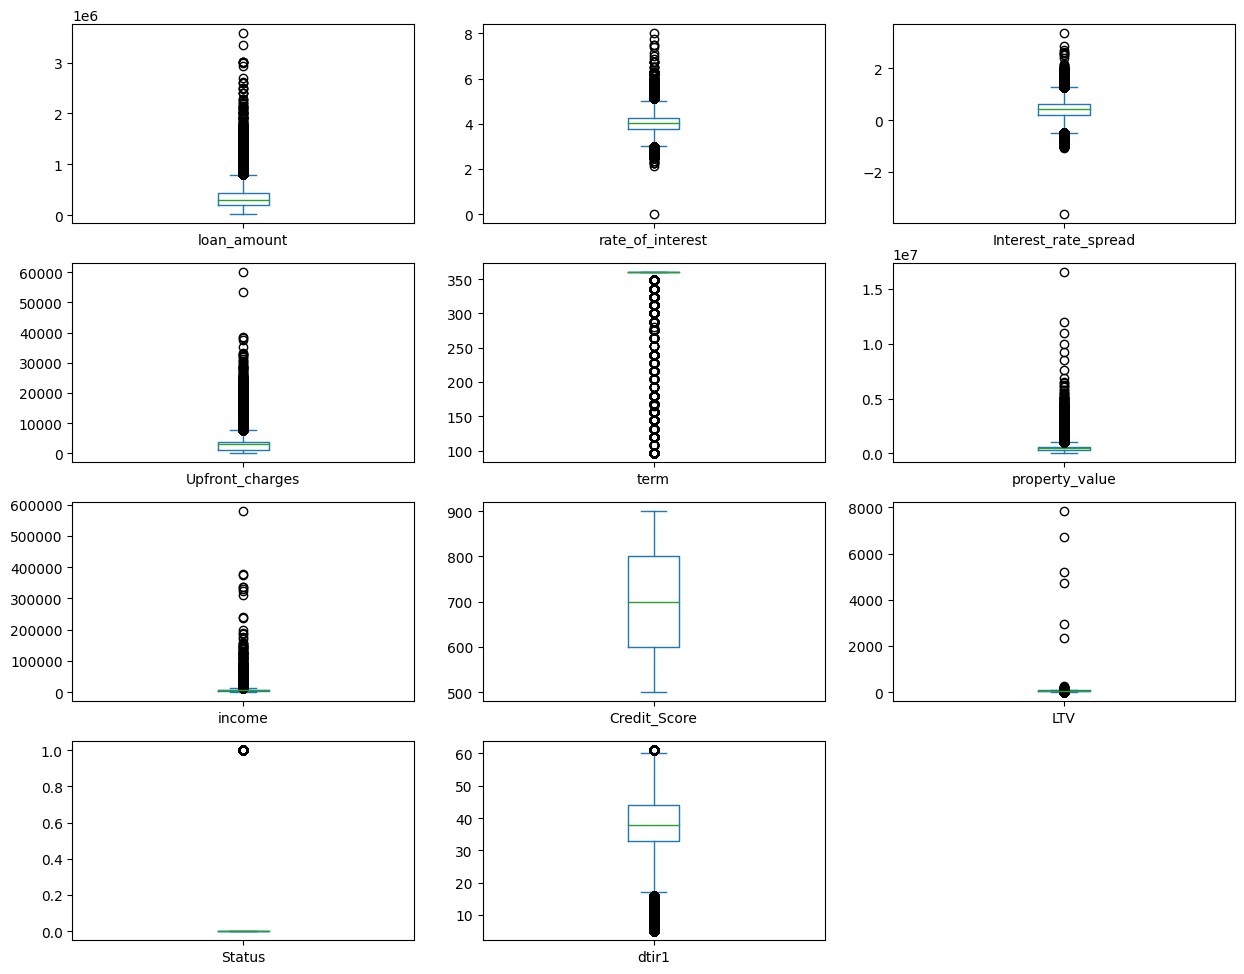

In [100]:
df.plot(kind="box",subplots=True,layout=(5,3),figsize=(15,15))

## credit_score is only one don't have outliers 

In [101]:
# Select only numeric columns
df1 = df.drop(["Status"], axis=1)
numeric_df = df1.select_dtypes(include=[np.number])

# Calculate quartiles and IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR)))

# Remove outliers
df = df[~outliers.any(axis=1)]

# Check the number of outliers removed for each feature
print("Number of outliers removed for each feature:")
print(outliers.sum())


Number of outliers removed for each feature:
loan_amount              1895
rate_of_interest         6817
Interest_rate_spread    11478
Upfront_charges          8915
term                    26985
property_value           6596
income                   7636
Credit_Score                0
LTV                      4671
dtir1                    5508
dtype: int64


loan_amount                Axes(0.125,0.747241;0.227941x0.132759)
rate_of_interest        Axes(0.398529,0.747241;0.227941x0.132759)
Interest_rate_spread    Axes(0.672059,0.747241;0.227941x0.132759)
Upfront_charges            Axes(0.125,0.587931;0.227941x0.132759)
term                    Axes(0.398529,0.587931;0.227941x0.132759)
property_value          Axes(0.672059,0.587931;0.227941x0.132759)
income                     Axes(0.125,0.428621;0.227941x0.132759)
Credit_Score            Axes(0.398529,0.428621;0.227941x0.132759)
LTV                     Axes(0.672059,0.428621;0.227941x0.132759)
Status                      Axes(0.125,0.26931;0.227941x0.132759)
dtir1                    Axes(0.398529,0.26931;0.227941x0.132759)
dtype: object

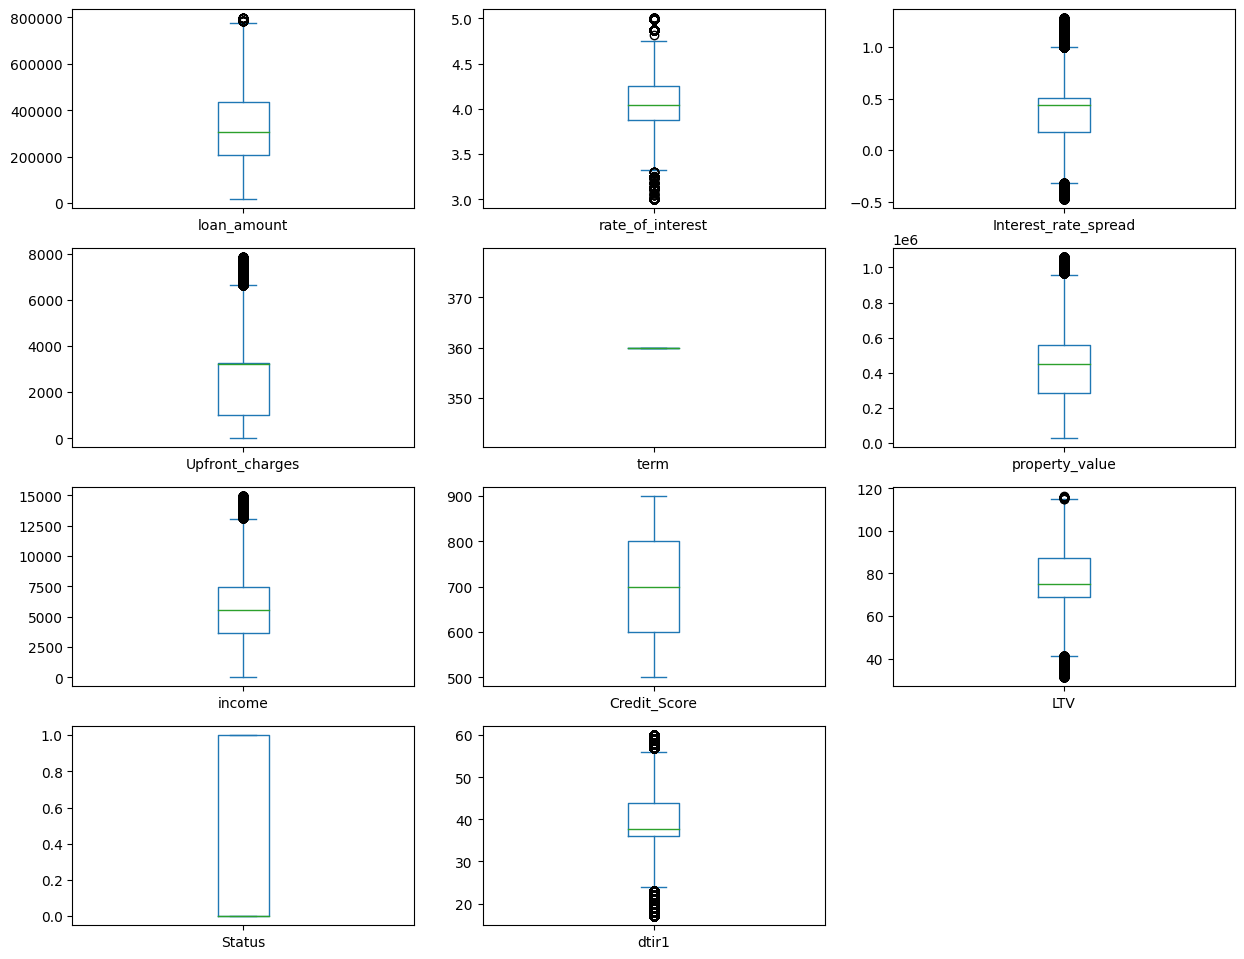

In [102]:
df.plot(kind="box",subplots=True,layout=(5,3),figsize=(15,15))

In [103]:
df.Status.unique()

array([1., 0.])

In [104]:
# adding a new feature 
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for i in cat:
    df[i] = label.fit_transform(df[i])
 


In [105]:
df

loan_limit  Gender  approv_in_adv  loan_type  loan_purpose  \
0                0       3              0          0             0   
1                0       2              0          1             0   
2                0       2              1          0             0   
3                0       2              0          0             3   
4                0       1              1          0             0   
...            ...     ...            ...        ...           ...   
148659           0       3              0          2             2   
148660           0       0              0          0             3   
148661           0       3              0          1             3   
148662           0       1              0          0             3   
148663           0       2              0          1             0   

        Credit_Worthiness  open_credit  business_or_commercial  loan_amount  \
0                       0            0                       1     116500.0   
1                       0            0                       0     206500.0   
2                       0            0                       1     406500.0   
3                       0            0                       1     456500.0   
4                       0            0                       1     696500.0   
...                   ...          ...                     ...          ...   
148659                  0            0                       1     416500.0   
148660                  0            0                       1     366500.0   
148661                  0            0                       0     346500.0   
148662                  0            0                       1     646500.0   
148663                  0            0                       0     106500.0   

        rate_of_interest  ...  credit_type  Credit_Score  \
0               4.045476  ...            3         758.0   
1               4.045476  ...            2         552.0   
2               4.560000  ...            3         834.0   
3               4.250000  ...            3         587.0   
4               4.000000  ...            1         602.0   
...                  ...  ...          ...           ...   
148659          4.375000  ...            3         520.0   
148660          3.875000  ...            0         851.0   
148661          4.045476  ...            3         585.0   
148662          3.625000  ...            0         873.0   
148663          4.045476  ...            2         619.0   

        co-applicant_credit_type  age  submission_of_application        LTV  \
0                              0    0                          1  98.728814   
1                              1    3                          1  72.746457   
2                              0    1                          1  80.019685   
3                              0    2                          0  69.376900   
4                              1    0                          0  91.886544   
...                          ...  ...                        ...        ...   
148659                         1    4                          1  68.503289   
148660                         1    2                          0  55.699088   
148661                         0    0                          1  96.787710   
148662                         1    2                          0  78.079710   
148663                         1    5                          1  72.746457   

        Region  Security_Type  Status      dtir1  
0            3              1     1.0  45.000000  
1            0              1     1.0  37.732932  
2            3              1     0.0  46.000000  
3            0              1     0.0  42.000000  
4            0              1     0.0  39.000000  
...        ...            ...     ...        ...  
148659       3              1     0.0  40.000000  
148660       0              1     0.0  20.000000  
148661       3              1     1.0  37.732932  
148662       0              1     0.0 

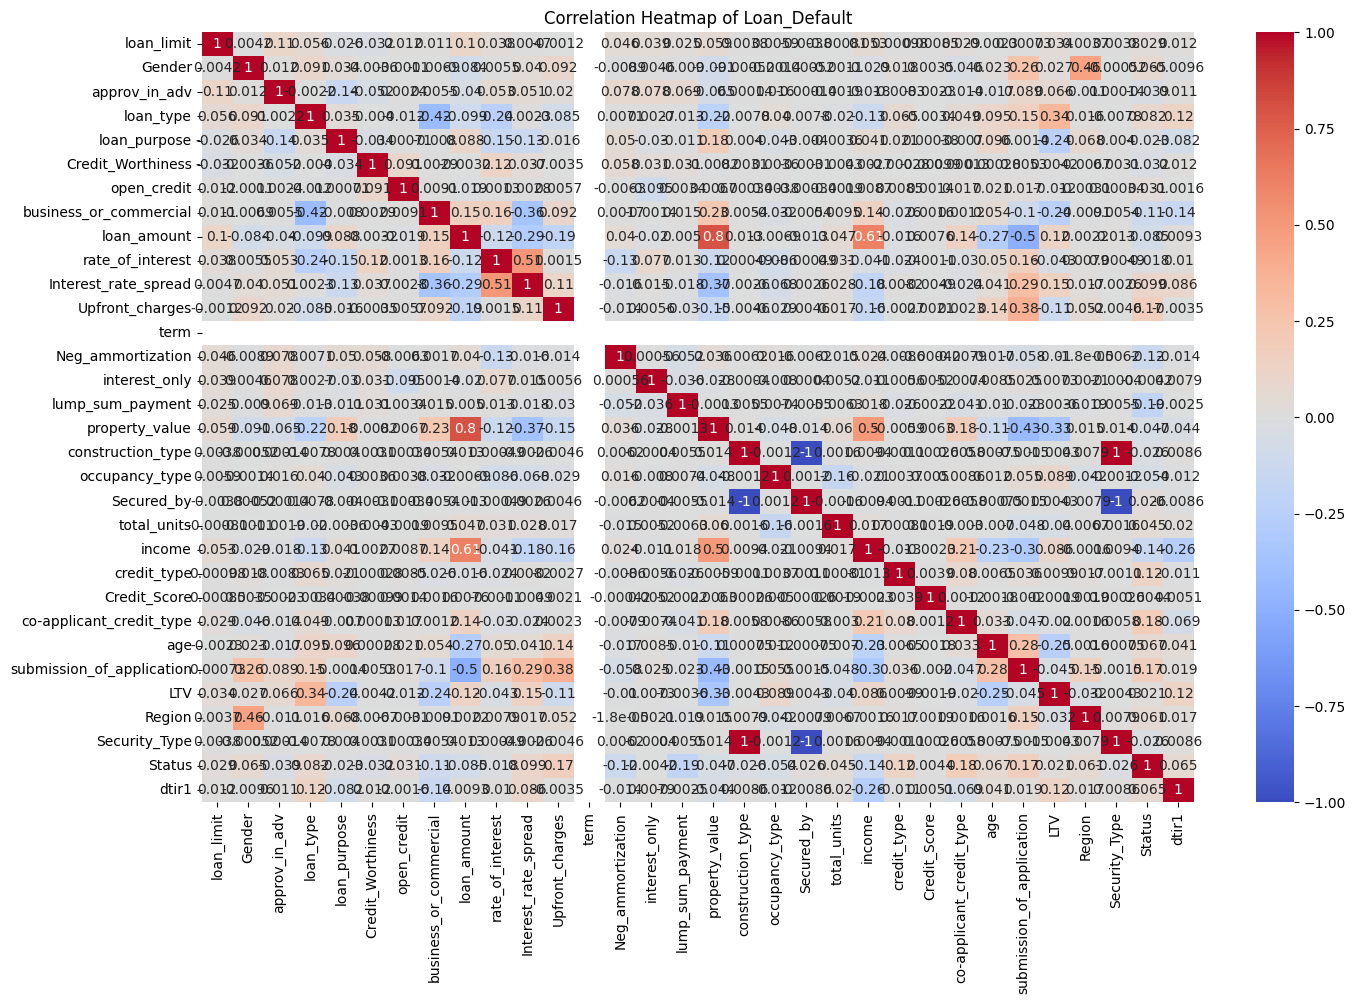

In [106]:
# heatmap for all features after encoding categorical data
numerical_cols = df.select_dtypes(include=['number'])

# Create a correlation matrix
correlation_matrix = numerical_cols.corr()

# Create a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Loan_Default')
plt.show()

the data is mostly equalized 


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91006 entries, 0 to 148663
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_limit                 91006 non-null  int64  
 1   Gender                     91006 non-null  int64  
 2   approv_in_adv              91006 non-null  int64  
 3   loan_type                  91006 non-null  int64  
 4   loan_purpose               91006 non-null  int64  
 5   Credit_Worthiness          91006 non-null  int64  
 6   open_credit                91006 non-null  int64  
 7   business_or_commercial     91006 non-null  int64  
 8   loan_amount                91006 non-null  float64
 9   rate_of_interest           91006 non-null  float64
 10  Interest_rate_spread       91006 non-null  float64
 11  Upfront_charges            91006 non-null  float64
 12  term                       91006 non-null  float64
 13  Neg_ammortization          91006 non-null  int64  

In [108]:
# Get the column names
column_names = df.columns
print(column_names)


Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only',
       'lump_sum_payment', 'property_value', 'construction_type',
       'occupancy_type', 'Secured_by', 'total_units', 'income', 'credit_type',
       'Credit_Score', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'LTV', 'Region', 'Security_Type', 'Status',
       'dtir1'],
      dtype='object')


In [109]:
# Split the dataset into input (X) and output (y)

X = df.drop(["Status"], axis=1)
y = df["Status"]


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Helper function: Evaluate model

In [110]:
from sklearn.model_selection import train_test_split,cross_val_score
# Models 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB ,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [111]:
def eval_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    return acc_train, acc_test

## Function to find the best random state

In [112]:
def randomstate(x,y):
    maxx=0
    model=LogisticRegression()
    for i in range(1,201):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
        model.fit(X_train,y_train)
        p=model.predict(X_test)
        accu=accuracy_score(p,y_test)
        if accu>maxx:
            maxx=accu
            j=i
    return j

In [113]:
randomstate(X,y)

39

## Splitting data into train and test

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=39)

## To evaluate performances of all the models

In [115]:
def performance(p,ytest,m,xtest,s):
    print('------------------------------------',m,'------------------------------------')
    print('Accuracy',np.round(accuracy_score(p,ytest),4))
    print('----------------------------------------------------------')
    print('Mean of Cross validation Score',np.round(s.mean(),4))
    print('----------------------------------------------------------')
    print('AUC_ROC Score',np.round(roc_auc_score(ytest,m.predict_proba(xtest)[:,1]),4))
    print('----------------------------------------------------------')
    print('Confusion Matrix')
    print(confusion_matrix(p,ytest))
    print('----------------------------------------------------------')
    print('Classification Report')
    print(classification_report(p,ytest))

### Creating a list of models which will be created one by one

In [116]:
models=[GaussianNB(),KNeighborsClassifier(n_neighbors=10),LogisticRegression(),DecisionTreeClassifier(),
        RandomForestClassifier(),XGBClassifier(),BernoulliNB()]

# Creates and trains model from the models list

In [117]:
def createmodel(X_train, y_train, X_test, y_test):
    for i in models:
        model=i
        model.fit(X_train,y_train)
        p=model.predict(X_test)
        score=cross_val_score(model,X,y,cv=5)
        performance(p,y_test,model,X_test,score) 

In [118]:
createmodel(X_train,y_train,X_test,y_test)

------------------------------------ GaussianNB() ------------------------------------
Accuracy 0.7453
----------------------------------------------------------
Mean of Cross validation Score 0.7418
----------------------------------------------------------
AUC_ROC Score 0.9998
----------------------------------------------------------
Confusion Matrix
[[16393  5795]
 [    0   564]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.74      0.85     22188
         1.0       0.09      1.00      0.16       564

    accuracy                           0.75     22752
   macro avg       0.54      0.87      0.51     22752
weighted avg       0.98      0.75      0.83     22752

------------------------------------ KNeighborsClassifier(n_neighbors=10) ------------------------------------
Accuracy 0.9164
----------------------------------------------------------
Mean of Cross valid

In [140]:
from sklearn.svm import SVC
acc_SVM = eval_model( SVC(), X_train, y_train, X_test, y_test) 
acc_SVM

(0.7602329542332839, 0.7588726513569938)

# Display models and accuercy score


In [119]:
acc_knn=eval_model(KNeighborsClassifier(n_neighbors=10), X_train, y_train, X_test, y_test)
acc_log=eval_model(LogisticRegression(), X_train, y_train, X_test, y_test)    
acc_rf=eval_model(RandomForestClassifier(), X_train, y_train, X_test, y_test)
acc_gaussian=eval_model(GaussianNB(), X_train, y_train, X_test, y_test)
acc_dt=eval_model(DecisionTreeClassifier(), X_train, y_train, X_test, y_test)
acc_BernoulliNB=eval_model(BernoulliNB(), X_train, y_train, X_test, y_test)

In [141]:
best_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',  
              'Decision Tree','SVM','BernoulliNB' ],
    'Training Score': [
        '{:.0f}%'.format(acc_knn[0]*100), 
        '{:.0f}%'.format(acc_log[0]*100),     
        '{:.0f}%'.format(acc_rf[0]*100), 
        '{:.0f}%'.format(acc_gaussian[0]*100),  
        '{:.0f}%'.format(acc_dt[0]*100),
        '{:.0f}%'.format(acc_SVM[0]*100),
        '{:.0f}%'.format(acc_BernoulliNB[0]*100),
        
    ],
    'Testing Score': [
        '{:.0f}%'.format(acc_knn[1]*100), 
        '{:.0f}%'.format(acc_log[1]*100),     
        '{:.0f}%'.format(acc_rf[1]*100), 
        '{:.0f}%'.format(acc_gaussian[1]*100),  
        '{:.0f}%'.format(acc_dt[1]*100),
        '{:.0f}%'.format(acc_SVM[1]*100),
        '{:.0f}%'.format(acc_BernoulliNB[1]*100),
    ]
})

best_models


Model Training Score Testing Score
0                  KNN            93%           92%
1  Logistic Regression            75%           76%
2        Random Forest           100%          100%
3          Naive Bayes            74%           75%
4        Decision Tree           100%          100%
5                  SVM            76%           76%
6          BernoulliNB            91%           91%

# Clustreing

In [121]:
from sklearn.cluster import KMeans
cluster_model = KMeans(2)
cluster_model.fit(X)
cluster_y = cluster_model.predict(X)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [122]:
y

0         1.0
1         1.0
2         0.0
3         0.0
4         0.0
         ... 
148659    0.0
148660    0.0
148661    1.0
148662    0.0
148663    1.0
Name: Status, Length: 91006, dtype: float64

In [123]:
k_values = list(range(2, 11))
errors = []

for k in k_values:
    cluster_model = KMeans(k)
    cluster_model.fit(X)
    e = cluster_model.inertia_
    errors.append(e)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

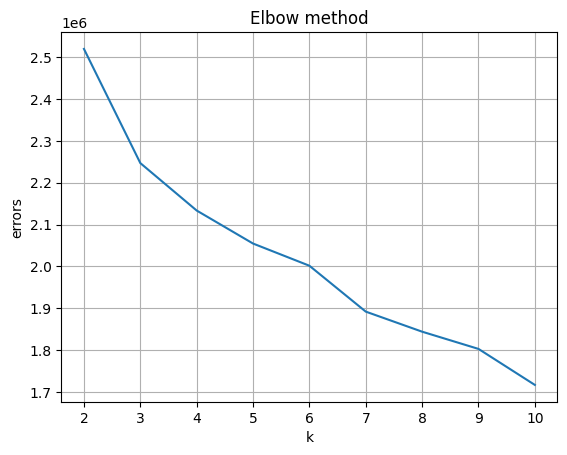

In [124]:
plt.plot(k_values, errors)
plt.title('Elbow method')
plt.xlabel('k')
plt.ylabel('errors')
plt.grid(axis='both')
plt.show()

In [125]:
from sklearn.metrics import silhouette_score

k_values = list(range(2, 11))
scores = []

for k in k_values:
    model = KMeans(k)
    y = model.fit_predict(X)
    s = silhouette_score(X, y)
    scores.append(s)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

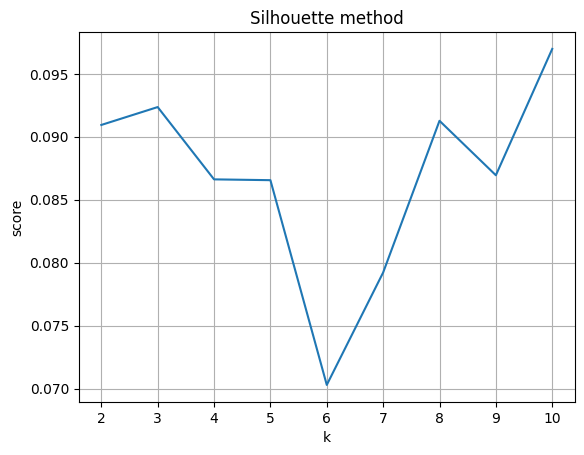

In [126]:
plt.plot(k_values, scores)
plt.title('Silhouette method')
plt.xlabel('k')
plt.ylabel('score')
plt.grid(axis='both')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



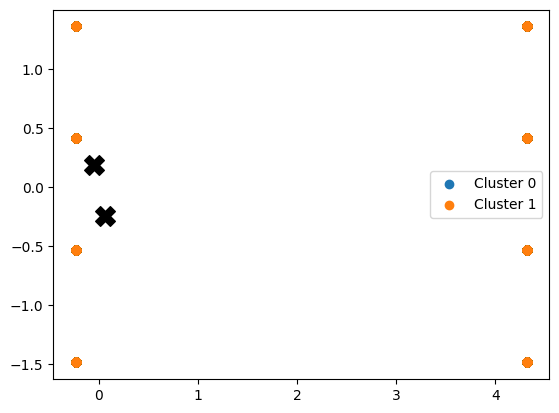

In [127]:
from sklearn.cluster import KMeans

# Create and fit KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# Assign clusters
predicted_labels = kmeans.predict(X)

# Visualize clusters
for i in range(kmeans.n_clusters):
    plt.scatter(X[predicted_labels == i, 0], X[predicted_labels == i, 1], label=f'Cluster {i}')
    plt.scatter(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1], s=200, marker='X', color='black')  # centroid

plt.legend()
plt.show()


# Visualize Confusion Matrix

In [128]:
def plot_conf_matrix(model, X_test, y_test):
    y_pred_test = model.predict(X_test)
    cf = confusion_matrix(y_test, y_pred_test)
    cf_row_sum = cf.sum(axis=1, keepdims=True)
    cf_normalized = cf/cf_row_sum
    sns.heatmap(cf_normalized, annot=True, cmap='Blues')
    plt.show()
    return cf

In [129]:
def plot_all_models(X_train, y_train, X_test, y_test):
    for i in models:
        model=i
        model.fit(X_train,y_train)
        print('------------------------------------',i,'------------------------------------')
        plot_conf_matrix(model, X_test, y_test)
        print('----------------------------------------------------------------------------------------------\n')

In [130]:
models=[GaussianNB(),KNeighborsClassifier(n_neighbors=10),LogisticRegression(),DecisionTreeClassifier(),
        RandomForestClassifier(),XGBClassifier(),BernoulliNB()]

------------------------------------ GaussianNB() ------------------------------------


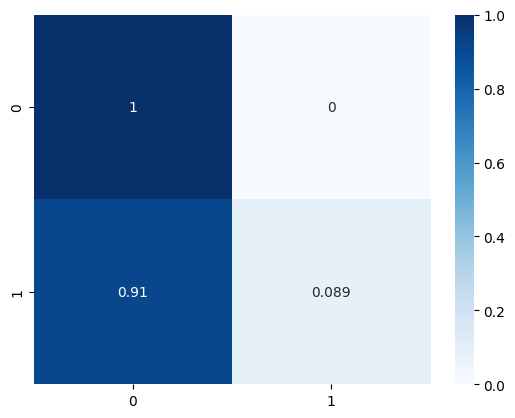

----------------------------------------------------------------------------------------------

------------------------------------ KNeighborsClassifier(n_neighbors=10) ------------------------------------


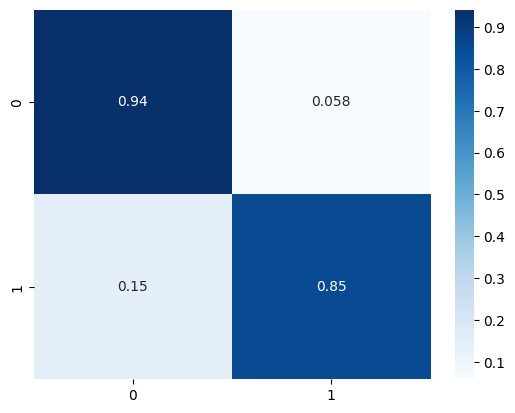

----------------------------------------------------------------------------------------------

------------------------------------ LogisticRegression() ------------------------------------


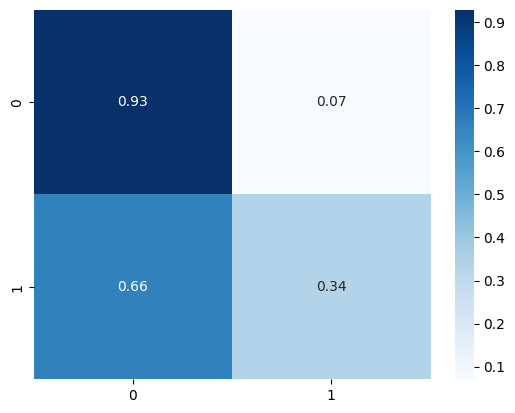

----------------------------------------------------------------------------------------------

------------------------------------ DecisionTreeClassifier() ------------------------------------


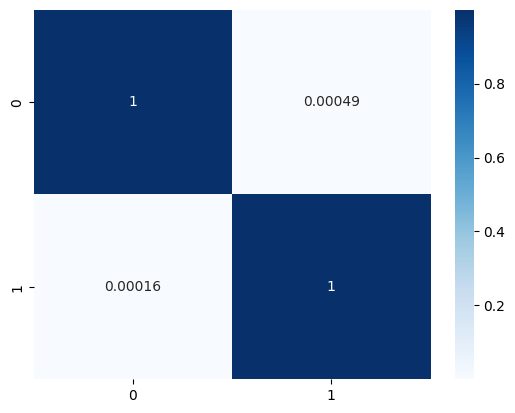

----------------------------------------------------------------------------------------------

------------------------------------ RandomForestClassifier() ------------------------------------


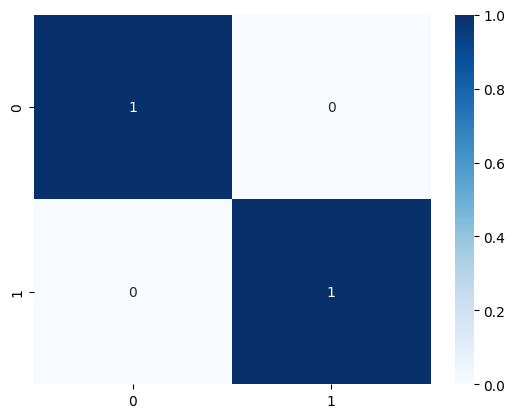

----------------------------------------------------------------------------------------------

------------------------------------ XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) ------------------------------------


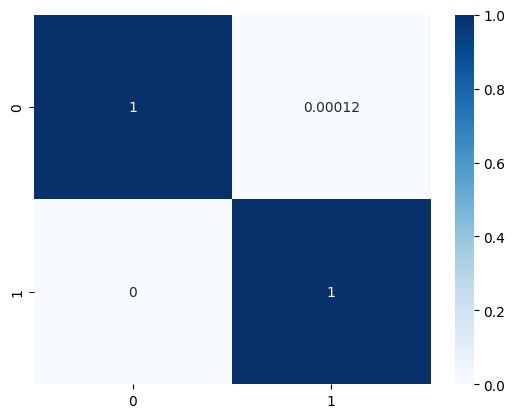

----------------------------------------------------------------------------------------------

------------------------------------ BernoulliNB() ------------------------------------


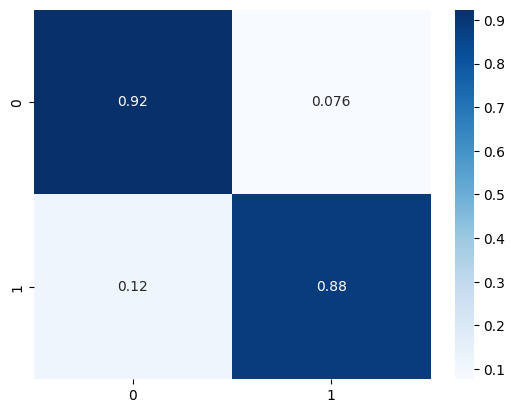

----------------------------------------------------------------------------------------------



In [131]:
plot_all_models(X_train, y_train, X_test, y_test)

In [132]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(model, X_test, y_test):
    # Predict probabilities
    y_probs = model.predict_proba(X_test)[:, 1]

    # Calculate fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)

    # Calculate AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds


In [133]:
def plot_all_roc_curve(X_test, y_test):
    for i in models:
        model=i
        print('------------------------------------',i,'------------------------------------')
        plot_roc_curve(model, X_test, y_test)
        print('----------------------------------------------------------------------------------------------\n')

------------------------------------ GaussianNB() ------------------------------------


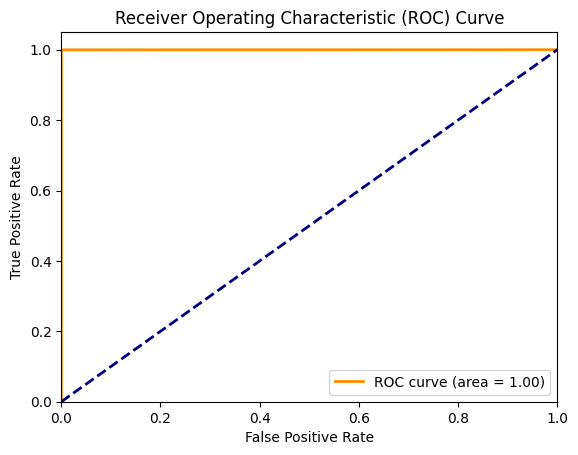

----------------------------------------------------------------------------------------------

------------------------------------ KNeighborsClassifier(n_neighbors=10) ------------------------------------


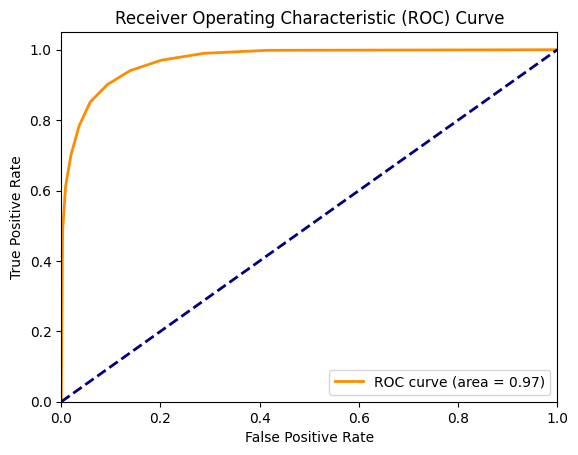

----------------------------------------------------------------------------------------------

------------------------------------ LogisticRegression() ------------------------------------


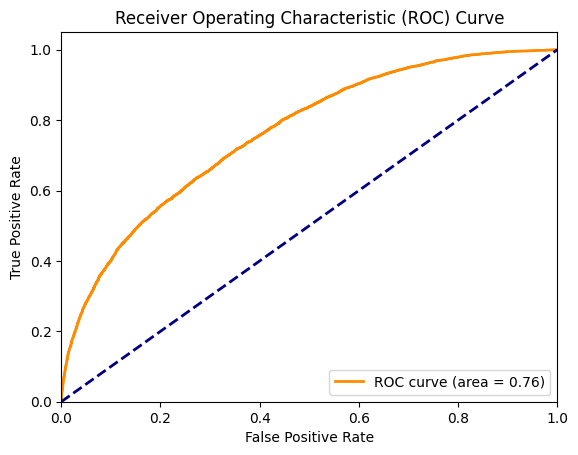

----------------------------------------------------------------------------------------------

------------------------------------ DecisionTreeClassifier() ------------------------------------


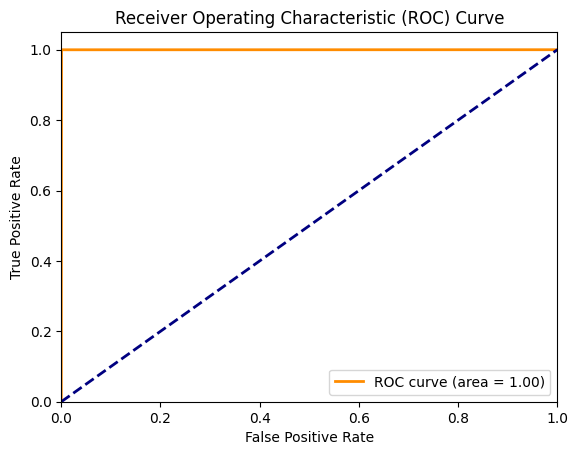

----------------------------------------------------------------------------------------------

------------------------------------ RandomForestClassifier() ------------------------------------


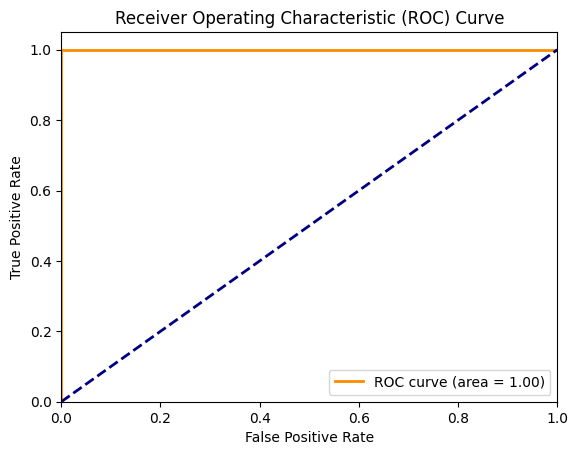

----------------------------------------------------------------------------------------------

------------------------------------ XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) ------------------------------------


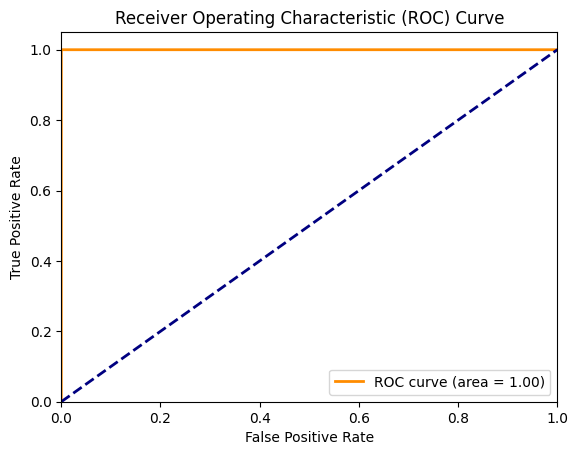

----------------------------------------------------------------------------------------------

------------------------------------ BernoulliNB() ------------------------------------


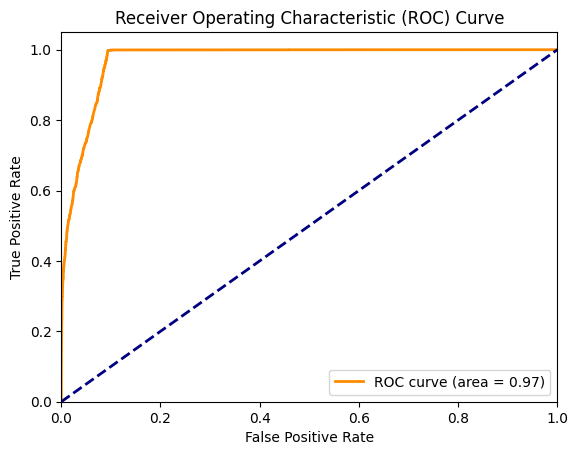

----------------------------------------------------------------------------------------------



In [134]:
plot_all_roc_curve(X_test, y_test)

# Check if the scaling affects accuracy or not.

In [135]:
X = df.drop(["Status"], axis=1)
y = df["Status"]

In [136]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)

In [137]:
# Train Random Forest model without scaling
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate accuracy without scaling
y_pred_no_scaling = rf_model.predict(X_test)
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)
print("Accuracy without scaling:", accuracy_no_scaling)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model with scaling
rf_model_scaled = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_scaled.fit(X_train_scaled, y_train)

# Evaluate accuracy with scaling
y_pred_with_scaling = rf_model_scaled.predict(X_test_scaled)
accuracy_with_scaling = accuracy_score(y_test, y_pred_with_scaling)
print("Accuracy with scaling:", accuracy_with_scaling)

# Compare accuracies
if accuracy_with_scaling > accuracy_no_scaling:
    print("Scaling improved accuracy.")
elif accuracy_with_scaling < accuracy_no_scaling:
    print("Scaling reduced accuracy.")
else:
    print("Scaling did not affect accuracy.")


Accuracy without scaling: 1.0
Accuracy with scaling: 1.0
Scaling did not affect accuracy.


## Check if the normalization affects accuracy or not.

In [138]:
from sklearn.preprocessing import MinMaxScaler
# Train Random Forest model without normalization
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate accuracy without normalization
y_pred_no_normalization = rf_model.predict(X_test)
accuracy_no_normalization = accuracy_score(y_test, y_pred_no_normalization)
print("Accuracy without normalization:", accuracy_no_normalization)

# Normalize the data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Train Random Forest model with normalization
rf_model_normalized = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_normalized.fit(X_train_normalized, y_train)

# Evaluate accuracy with normalization
y_pred_with_normalization = rf_model_normalized.predict(X_test_normalized)
accuracy_with_normalization = accuracy_score(y_test, y_pred_with_normalization)
print("Accuracy with normalization:", accuracy_with_normalization)

# Compare accuracies
if accuracy_with_normalization > accuracy_no_normalization:
    print("Normalization improved accuracy.")
elif accuracy_with_normalization < accuracy_no_normalization:
    print("Normalization reduced accuracy.")
else:
    print("Normalization did not affect accuracy.")


Accuracy without normalization: 1.0
Accuracy with normalization: 1.0
Normalization did not affect accuracy.


## Check if the Dimensionality Reduction affects accuracy or not.

In [139]:
from sklearn.decomposition import PCA

# Train Random Forest model without dimensionality reduction
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate accuracy without dimensionality reduction
y_pred_no_reduction = rf_model.predict(X_test)
accuracy_no_reduction = accuracy_score(y_test, y_pred_no_reduction)
print("Accuracy without dimensionality reduction:", accuracy_no_reduction)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train Random Forest model with dimensionality reduction
rf_model_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_pca.fit(X_train_pca, y_train)

# Evaluate accuracy with dimensionality reduction
y_pred_with_reduction = rf_model_pca.predict(X_test_pca)
accuracy_with_reduction = accuracy_score(y_test, y_pred_with_reduction)
print("Accuracy with dimensionality reduction:", accuracy_with_reduction)

# Compare accuracies
if accuracy_with_reduction > accuracy_no_reduction:
    print("Dimensionality reduction improved accuracy.")
elif accuracy_with_reduction < accuracy_no_reduction:
    print("Dimensionality reduction reduced accuracy.")
else:
    print("Dimensionality reduction did not affect accuracy.")


Accuracy without dimensionality reduction: 1.0
Accuracy with dimensionality reduction: 0.7976046588287001
Dimensionality reduction reduced accuracy.
